In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/julien/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/home/julien/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/julien/.fastai/data/oxford-iiit-pet/images')]

In [6]:
path_anno = path/'annotations'
path_img=path/'images'

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/julien/.fastai/data/oxford-iiit-pet/images/Bengal_117.jpg'),
 PosixPath('/home/julien/.fastai/data/oxford-iiit-pet/images/pomeranian_99.jpg'),
 PosixPath('/home/julien/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_61.jpg'),
 PosixPath('/home/julien/.fastai/data/oxford-iiit-pet/images/japanese_chin_200.jpg'),
 PosixPath('/home/julien/.fastai/data/oxford-iiit-pet/images/saint_bernard_157.jpg')]

In [8]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [9]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,pomeranian,staffordshire_bull_terrier,Sphynx,wheaten_terrier
Path: /home/julien/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,wheaten_terrier,american_bulldog,scottish_terrier,Russian_Blue
Path: /home/julien/.fastai/data/oxford-iiit-pet/images;

Test: None

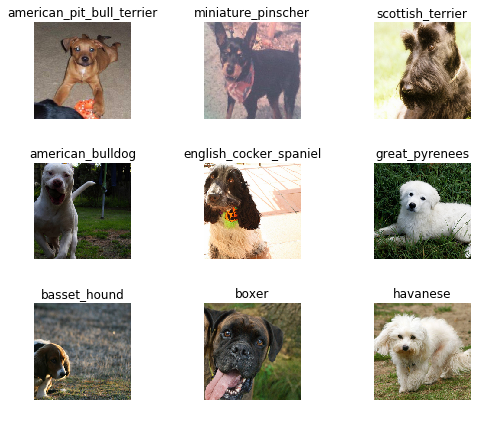

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [11]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.403939,0.310453,0.089986,00:17
1,0.552479,0.224592,0.076455,00:17
2,0.356526,0.195088,0.062923,00:17
3,0.262430,0.191755,0.062246,00:17


In [14]:
learn.save('stage-1')

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

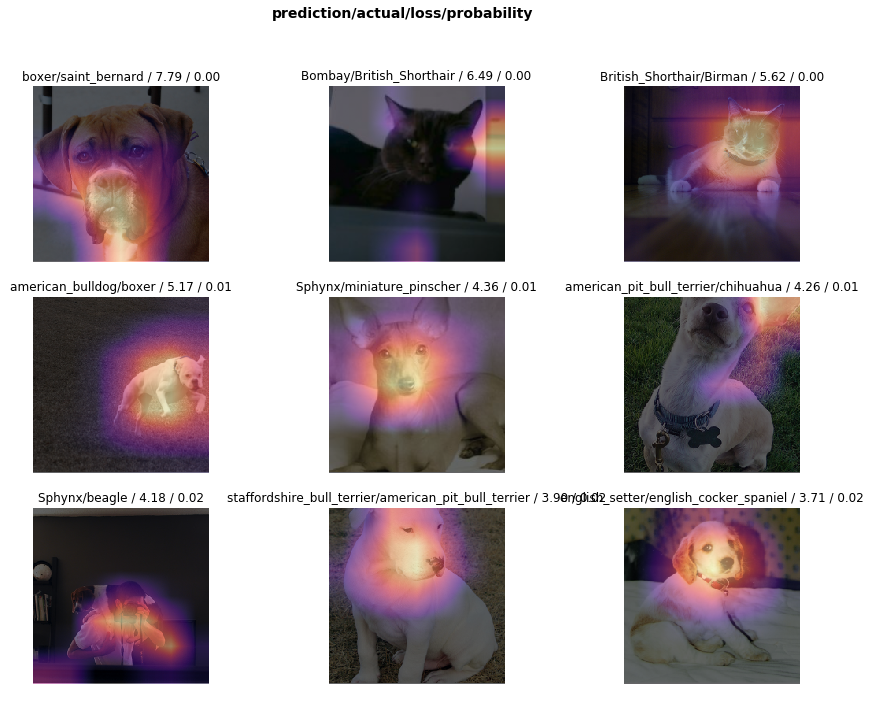

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

In [17]:
doc(interp.plot_multi_top_losses)

TypeError: markdown2html() missing 1 required positional argument: 'source'

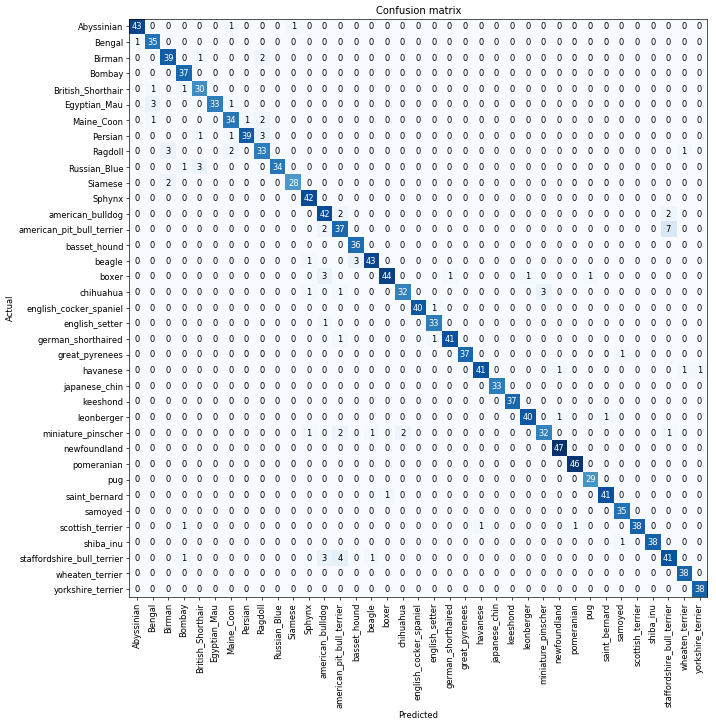

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Persian', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Birman', 'Ragdoll', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.556983,0.324155,0.102842,00:20


In [23]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,pomeranian,staffordshire_bull_terrier,Sphynx,wheaten_terrier
Path: /home/julien/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,wheaten_terrier,american_bulldog,scottish_terrier,Russian_Blue
Path: /home/julien/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(